# Grover Search Algorithm

Grover is a quantum search algorithm for (unsorted) unstructured data. Given an oracle for the target state, the algorithm has a quadratic speedup over classical search algorithms.

The classical time complexity of searching an unsorted list of $N$ elements is $O(N)$. Grover's algorithm can search the list in $O(\sqrt{N})$ time. We will explore examples and limitations.

In [1]:
import sys

sys.path.append("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skq.circuits.grover import GroverSearch
from skq.converters import pipeline_to_qiskit_circuit

The algorithm should be able to recover the `target_state` in the output. It achieves this to the process of amplitude amplification.

In [3]:
# 3 qubits example
target_state = [0, 0, 0, 1, 0, 0, 0, 0]
n_qubits = int(np.log2(len(target_state)))
n_iterations = 1

pipe = GroverSearch(n_qubits=n_qubits, target_state=target_state, n_iterations=n_iterations)

In [4]:
pipe

GroverSearch(n_iterations=1, n_qubits=3,
             target_state=Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j]))

In [5]:
# |000> initial state
state0 = np.zeros(2**n_qubits, dtype=complex)
state0[0] = 1.0
state0 = np.atleast_2d(state0)

After 1 Grover iteration the amplitudes are not perfect, but sufficient to recover the target state.

In [6]:
result = pipe.transform(state0)
result

array([[0.1767767 +0.j, 0.1767767 +0.j, 0.1767767 +0.j, 0.88388348+0.j,
        0.1767767 +0.j, 0.1767767 +0.j, 0.1767767 +0.j, 0.1767767 +0.j]])

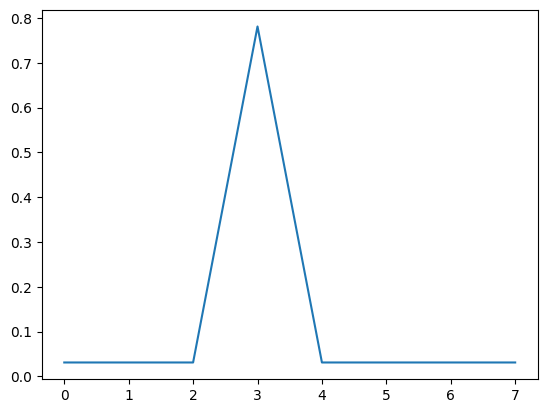

In [7]:
plt.plot(np.abs(result[0]) ** 2);

In [8]:
result.round()

array([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [9]:
assert np.isclose(result.round(), target_state).all()

As you can see we are able to recover the correct result. Now let's go through it step by step to see what is going on.

The first step puts all qubits in an equal superposition by applying a Hadamard gate to each qubit. This superposition is essential to get quantum interference effects that allow us to gain an advantage over classical algorithms.

In [10]:
pipe[0].transform(state0)

array([[0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
        0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j]])

TODO: Explain each step and build circuit from scratch with gate tranformers.

In [11]:
qiskit_circuit = pipeline_to_qiskit_circuit(pipe, num_qubits=n_qubits, measure_all=True)

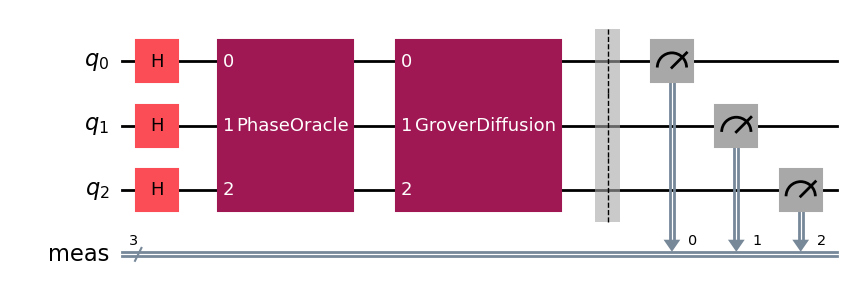

In [12]:
qiskit_circuit.draw("mpl")